## Задание 2: Анализ архитектур CNN (30 баллов)

In [30]:
import torch
from convolutional_basics.datasets import get_mnist_loaders, get_cifar_loaders
from convolutional_basics.models import SimpleCNN, CNNWithResidual, CIFARCNN
from convolutional_basics.trainer import train_model
from convolutional_basics.utils import plot_training_history, count_parameters
from matplotlib import pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from convolutional_basics.models import ResidualBlock

### 2.1 Влияние размера ядра свертки (15 баллов)
```python
# Исследуйте влияние размера ядра свертки:
# - 3x3 ядра
# - 5x5 ядра
# - 7x7 ядра
# - Комбинация разных размеров (1x1 + 3x3)
# 
# Для каждого варианта:
# - Поддерживайте одинаковое количество параметров
# - Сравните точность и время обучения
# - Проанализируйте рецептивные поля
# - Визуализируйте активации первого слоя
```

In [9]:
device = torch.device('cpu')
train_loader, test_loader = get_mnist_loaders(batch_size=64)

In [6]:
class SimpleCNN(nn.Module):
    def __init__(self, kernel_size=3, input_channels=1, num_classes=10):
        super().__init__()
        
        # Для комбинации слоев не вычисляем padding
        if kernel_size == "combo":
            self.conv1 = nn.Sequential(
                nn.Conv2d(input_channels, 16, kernel_size=1, padding=0),
                nn.ReLU(),
                nn.Conv2d(16, 24, kernel_size=3, padding=1)
            )
            self.conv2 = nn.Conv2d(24, 64, kernel_size=3, padding=1)
            channels = [24, 64]
        else:
            # Для обычных ядер вычисляем padding
            padding = kernel_size // 2
            
            # Подбираем количество каналов для сохранения параметров
            if kernel_size == 3:
                channels = [32, 64]
            elif kernel_size == 5:
                channels = [24, 61]
            elif kernel_size == 7:
                channels = [16, 60]
            
            self.conv1 = nn.Conv2d(input_channels, channels[0], kernel_size, padding=padding)
            self.conv2 = nn.Conv2d(channels[0], channels[1], kernel_size, padding=padding)
        
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(channels[1] * 7 * 7, 128)
        self.fc2 = nn.Linear(128, num_classes)
        self.dropout = nn.Dropout(0.25)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [ ]:
CNN_3x3 = SimpleCNN(kernel_size=3, input_channels=1, num_classes=10)
CNN_5x5 = SimpleCNN(kernel_size=5, input_channels=1, num_classes=10)
CNN_7x7 = SimpleCNN(kernel_size=7, input_channels=1, num_classes=10)
CNN_combo = SimpleCNN(kernel_size="combo", input_channels=1, num_classes=10)

CNNs = [CNN_3x3, CNN_5x5, CNN_7x7, CNN_combo]

In [ ]:

print(f"3x3 params: {count_parameters(CNN_3x3):,}")
print(f"5x5 params: {count_parameters(CNN_5x5):,}")
print(f"7x7 params: {count_parameters(CNN_7x7):,}")
print(f"Combo params: {count_parameters(CNN_combo):,}")

3x3 params: 421,642
5x5 params: 421,295
7x7 params: 425,638
Combo params: 420,226


In [16]:
print(f"Simple CNN parameters: {count_parameters(CNN_3x3)}")

print("Training CNN_3x3...")
CNN_3x3_history = train_model(CNN_3x3, train_loader, test_loader, epochs=5, device=str(device))

Simple CNN parameters: 421642
Training CNN_3x3...


100%|██████████| 157/157 [00:04<00:00, 39.14it/s]


Epoch 1/5:
Train Loss: 0.1482, Train Acc: 0.9538
Test Loss: 0.0411, Test Acc: 0.9868
--------------------------------------------------


100%|██████████| 157/157 [00:04<00:00, 36.70it/s]


Epoch 2/5:
Train Loss: 0.0524, Train Acc: 0.9841
Test Loss: 0.0345, Test Acc: 0.9878
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 40.58it/s]


Epoch 3/5:
Train Loss: 0.0379, Train Acc: 0.9882
Test Loss: 0.0314, Test Acc: 0.9888
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 40.74it/s]


Epoch 4/5:
Train Loss: 0.0282, Train Acc: 0.9913
Test Loss: 0.0246, Test Acc: 0.9916
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 41.09it/s]

Epoch 5/5:
Train Loss: 0.0236, Train Acc: 0.9924
Test Loss: 0.0239, Test Acc: 0.9905
--------------------------------------------------


In [17]:
print(f"Simple CNN parameters: {count_parameters(CNN_5x5)}")

print("Training CNN_5x5...")
CNN_5x5_history = train_model(CNN_5x5, train_loader, test_loader, epochs=5, device=str(device))

Simple CNN parameters: 421295
Training CNN_5x5...


100%|██████████| 157/157 [00:03<00:00, 40.19it/s]


Epoch 1/5:
Train Loss: 0.1595, Train Acc: 0.9511
Test Loss: 0.0527, Test Acc: 0.9819
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 40.81it/s]


Epoch 2/5:
Train Loss: 0.0527, Train Acc: 0.9838
Test Loss: 0.0271, Test Acc: 0.9908
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 40.10it/s]


Epoch 3/5:
Train Loss: 0.0369, Train Acc: 0.9886
Test Loss: 0.0250, Test Acc: 0.9917
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 41.07it/s]


Epoch 4/5:
Train Loss: 0.0288, Train Acc: 0.9908
Test Loss: 0.0297, Test Acc: 0.9901
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 40.82it/s]

Epoch 5/5:
Train Loss: 0.0232, Train Acc: 0.9926
Test Loss: 0.0290, Test Acc: 0.9919
--------------------------------------------------


In [18]:
print(f"Simple CNN parameters: {count_parameters(CNN_7x7)}")

print("Training CNN_7x7...")
CNN_7x7_history = train_model(CNN_7x7, train_loader, test_loader, epochs=5, device=str(device))

Simple CNN parameters: 425638
Training CNN_7x7...


100%|██████████| 157/157 [00:03<00:00, 41.10it/s]


Epoch 1/5:
Train Loss: 0.1534, Train Acc: 0.9520
Test Loss: 0.0417, Test Acc: 0.9857
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 41.58it/s]


Epoch 2/5:
Train Loss: 0.0520, Train Acc: 0.9840
Test Loss: 0.0352, Test Acc: 0.9887
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 42.15it/s]


Epoch 3/5:
Train Loss: 0.0377, Train Acc: 0.9883
Test Loss: 0.0237, Test Acc: 0.9914
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 40.80it/s]


Epoch 4/5:
Train Loss: 0.0277, Train Acc: 0.9915
Test Loss: 0.0304, Test Acc: 0.9908
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 41.88it/s]

Epoch 5/5:
Train Loss: 0.0239, Train Acc: 0.9925
Test Loss: 0.0266, Test Acc: 0.9926
--------------------------------------------------


In [19]:
print(f"Simple CNN parameters: {count_parameters(CNN_combo)}")

print("Training CNN_combo...")
CNN_combo_history = train_model(CNN_combo, train_loader, test_loader, epochs=5, device=str(device))

Simple CNN parameters: 420226
Training CNN_combo...


100%|██████████| 157/157 [00:04<00:00, 36.11it/s]


Epoch 1/5:
Train Loss: 0.1709, Train Acc: 0.9480
Test Loss: 0.0381, Test Acc: 0.9870
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 39.61it/s]


Epoch 2/5:
Train Loss: 0.0523, Train Acc: 0.9839
Test Loss: 0.0348, Test Acc: 0.9882
--------------------------------------------------


100%|██████████| 157/157 [00:04<00:00, 36.23it/s]


Epoch 3/5:
Train Loss: 0.0379, Train Acc: 0.9880
Test Loss: 0.0258, Test Acc: 0.9918
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 40.61it/s]


Epoch 4/5:
Train Loss: 0.0298, Train Acc: 0.9908
Test Loss: 0.0274, Test Acc: 0.9917
--------------------------------------------------


100%|██████████| 157/157 [00:04<00:00, 35.88it/s]

Epoch 5/5:
Train Loss: 0.0241, Train Acc: 0.9921
Test Loss: 0.0282, Test Acc: 0.9905
--------------------------------------------------


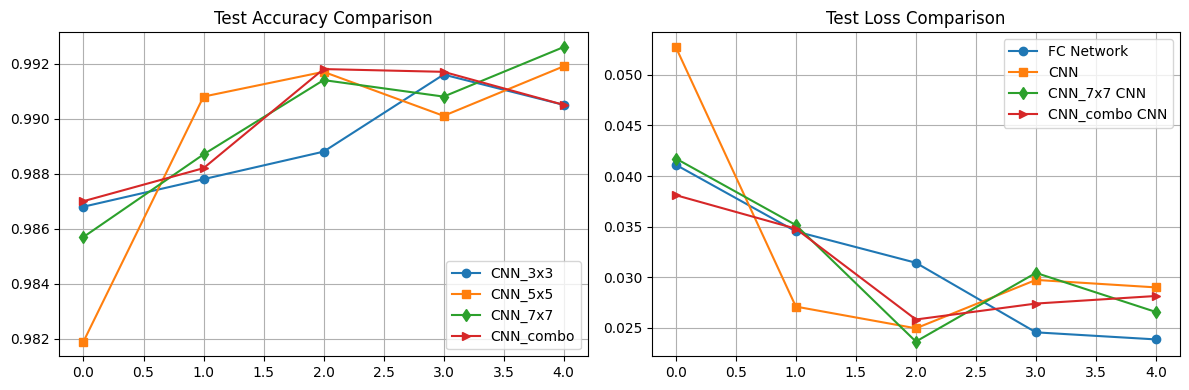

In [29]:
def compare_models(CNN_3x3, CNN_5x5, CNN_7x7, CNN_combo):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    ax1.plot(CNN_3x3['test_accs'], label='CNN_3x3', marker='o')
    ax1.plot(CNN_5x5['test_accs'], label='CNN_5x5', marker='s')
    ax1.plot(CNN_7x7['test_accs'], label='CNN_7x7', marker='d')
    ax1.plot(CNN_combo['test_accs'], label='CNN_combo', marker='>')
    ax1.set_title('Test Accuracy Comparison')
    ax1.legend()
    ax1.grid(True)
    
    ax2.plot(CNN_3x3['test_losses'], label='FC Network', marker='o')
    ax2.plot(CNN_5x5['test_losses'], label='CNN', marker='s')
    ax2.plot(CNN_7x7['test_losses'], label='CNN_7x7 CNN', marker='d')
    ax2.plot(CNN_combo['test_losses'], label='CNN_combo CNN', marker='>')
    ax2.set_title('Test Loss Comparison')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show() 
    
# CNNs = [CNN_3x3, CNN_5x5, CNN_7x7, CNN_combo]
compare_models(CNN_3x3_history, CNN_5x5_history, CNN_7x7_history, CNN_combo_history) 

Время обучение всех моделей заняло почти одинаковое время.

Самая высокая точность у CNN с размером ядра свертки 7 на 7. Все модели в моменте переобучались. Самые плохие плказатели у CNN с размером ядра свертки 3 на 3 и с комбинационным размером свертки

Несмотя на то, что CNN с размером ядра свертки 3 на 3 имееть одну из худших точностей, она также имеет лучшую (наименьшую) функцию потерь. Чуть большую функцию потерь имеет CNN 7 на 7

In [21]:
def visualize_activations(model, test_loader, device):
    model.eval()
    images, _ = next(iter(test_loader))
    images = images.to(device)
    
    # Хуки для захвата активаций
    activations = {}
    def get_activation(name):
        def hook(model, input, output):
            activations[name] = output.detach()
        return hook
    
    model.conv1.register_forward_hook(get_activation('conv1'))
    model(images)
    
    # Визуализация первых 16 фильтров
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    for i in range(16):
        ax = axes[i//4, i%4]
        ax.imshow(activations['conv1'][0, i].cpu(), cmap='viridis')
        ax.axis('off')
    plt.show()

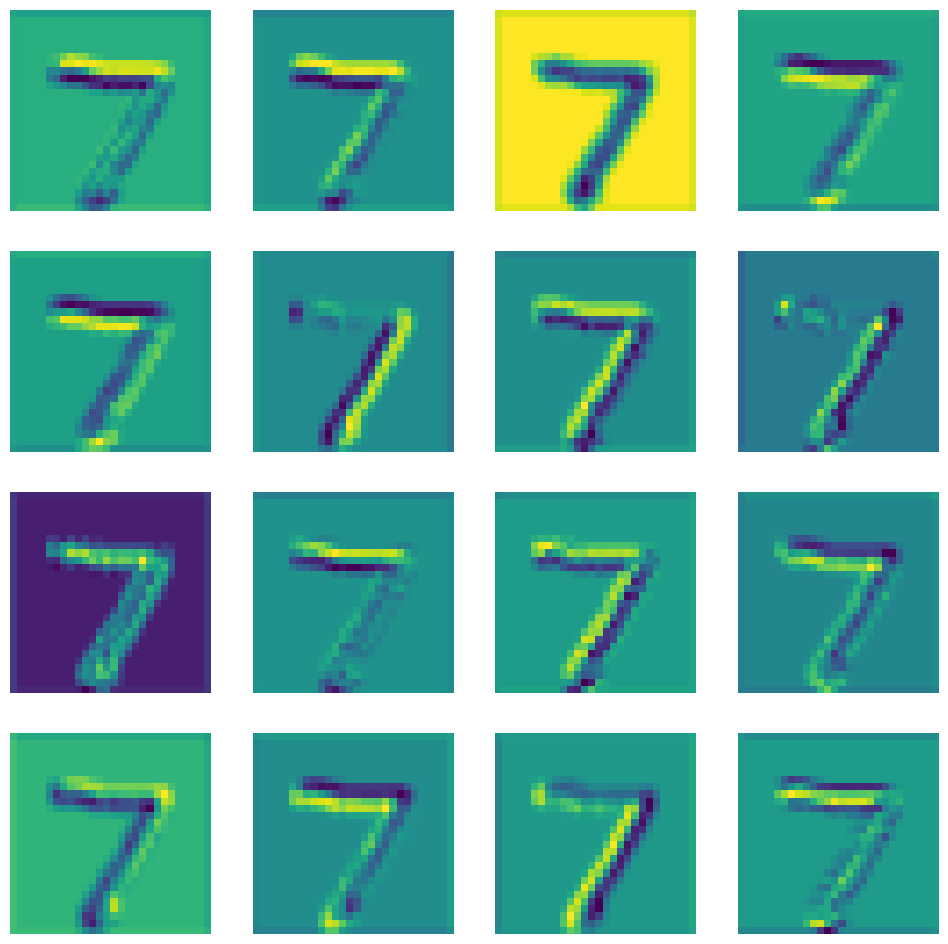

------------------------------------------------------------------------------------------------------------------------------------------------------


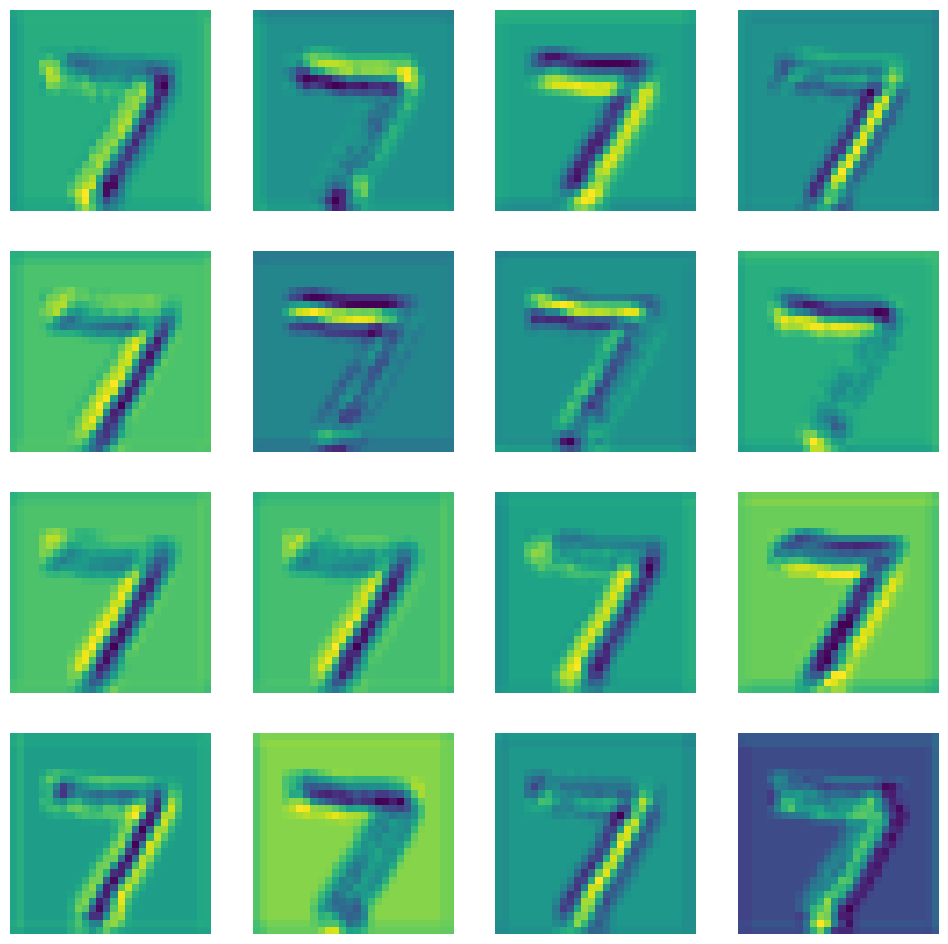

------------------------------------------------------------------------------------------------------------------------------------------------------


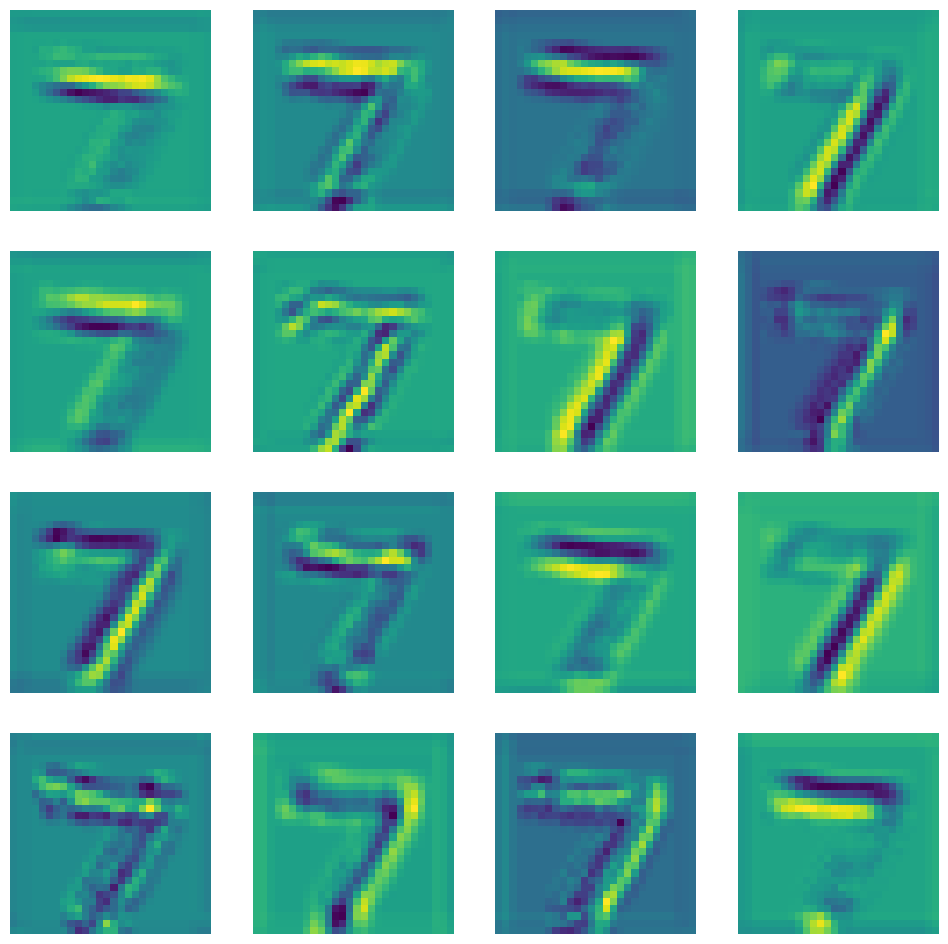

------------------------------------------------------------------------------------------------------------------------------------------------------


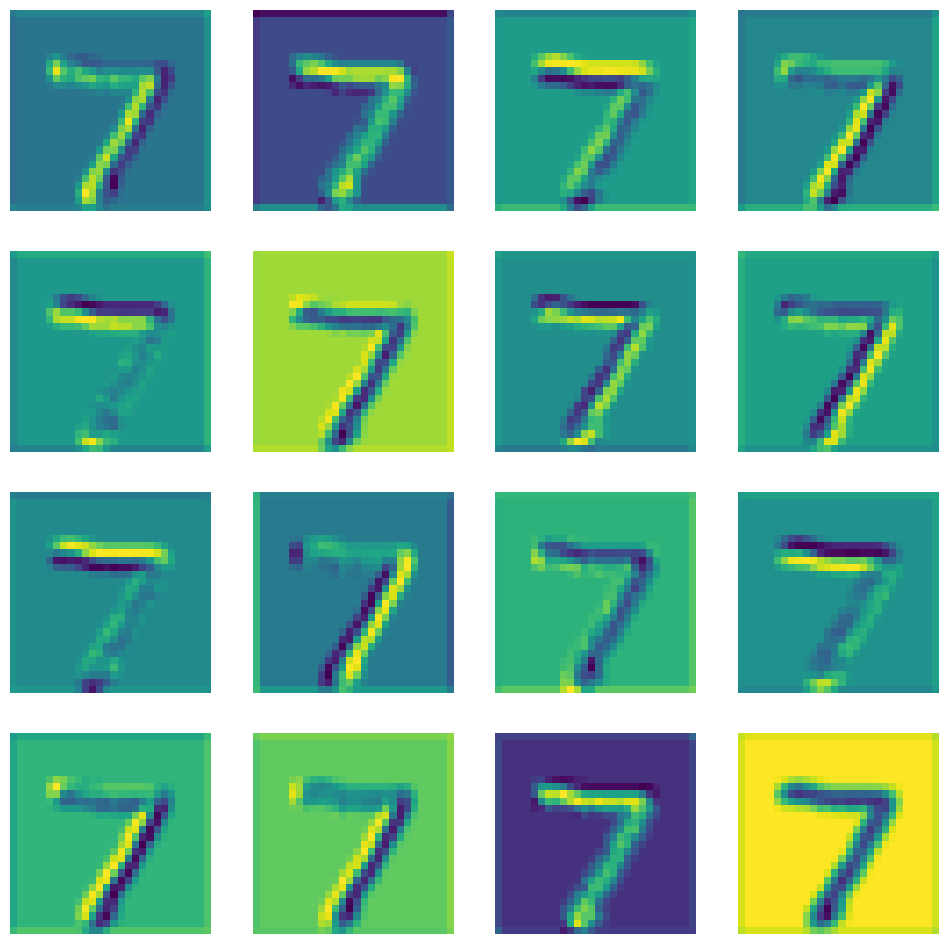

In [25]:
visualize_activations(CNN_3x3, test_loader, device)
print('-' * 150)
visualize_activations(CNN_5x5, test_loader, device)
print('-' * 150)
visualize_activations(CNN_7x7, test_loader, device)
print('-' * 150)
visualize_activations(CNN_combo, test_loader, device)

### 2.2 Влияние глубины CNN (15 баллов)
```python
# Исследуйте влияние глубины CNN:
# - Неглубокая CNN (2 conv слоя)
# - Средняя CNN (4 conv слоя)
# - Глубокая CNN (6+ conv слоев)
# - CNN с Residual связями
# 
# Для каждого варианта:
# - Сравните точность и время обучения
# - Проанализируйте vanishing/exploding gradients
# - Исследуйте эффективность Residual связей
# - Визуализируйте feature maps
```

In [56]:
class ShallowCNN(nn.Module):
    """Неглубокая CNN (2 сверточных слоя)"""
    def __init__(self, num_classes=10):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(64 * 7 * 7, num_classes)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        return self.fc(x)


class MediumCNN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)  # было 32
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)  # было 64
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)  # было 128
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)  # было 256
        
        self.pool = nn.MaxPool2d(2, 2)
        self.gap = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(128, num_classes)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # 28x28 -> 14x14
        x = self.pool(F.relu(self.conv2(x)))  # 14x14 -> 7x7
        x = self.pool(F.relu(self.conv3(x)))  # 7x7 -> 3x3
        x = F.relu(self.conv4(x))             # 3x3 -> 3x3
        
        x = self.gap(x)                   
        x = x.view(x.size(0), -1)            
        
        return self.fc(x)

class DeepCNN(nn.Module):
    """Глубокая CNN (6 сверточных слоев)"""
    def __init__(self, num_classes=10):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, 3, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1))
        )
        self.classifier = nn.Linear(128, num_classes)
        
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)


class ResNetMNIST(nn.Module):
    """CNN с Residual связями (8 слоев)"""
    def __init__(self, num_classes=10):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1)
        self.bn1 = nn.BatchNorm2d(32)
        
        # Residual блоки
        self.layer1 = self._make_layer(32, 32, 2)
        self.layer2 = self._make_layer(32, 64, 2, stride=2)
        self.layer3 = self._make_layer(64, 128, 2, stride=2)
        self.layer4 = self._make_layer(128, 256, 2)
        
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(256, num_classes)
    
    def _make_layer(self, in_channels, out_channels, blocks, stride=1):
        layers = [ResidualBlock(in_channels, out_channels, stride)]
        for _ in range(1, blocks):
            layers.append(ResidualBlock(out_channels, out_channels))
        return nn.Sequential(*layers)
    
    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)

In [57]:
shallowCNN = ShallowCNN()
mediumCNN = MediumCNN()
deepCNN = DeepCNN()
restNetNmist = ResNetMNIST()

In [33]:
print(f"shallow CNN parameters: {count_parameters(shallowCNN)}")

print("Training shallow CNN...")
shallowCNN_history = train_model(shallowCNN, train_loader, test_loader, epochs=5, device=str(device))

shallow CNN parameters: 50186
Training shallow CNN...


100%|██████████| 157/157 [00:04<00:00, 36.65it/s]


Epoch 1/5:
Train Loss: 0.1331, Train Acc: 0.9592
Test Loss: 0.0481, Test Acc: 0.9842
--------------------------------------------------


100%|██████████| 157/157 [00:04<00:00, 37.61it/s]


Epoch 2/5:
Train Loss: 0.0455, Train Acc: 0.9856
Test Loss: 0.0394, Test Acc: 0.9867
--------------------------------------------------


100%|██████████| 157/157 [00:04<00:00, 38.19it/s]


Epoch 3/5:
Train Loss: 0.0326, Train Acc: 0.9897
Test Loss: 0.0334, Test Acc: 0.9890
--------------------------------------------------


100%|██████████| 157/157 [00:04<00:00, 35.93it/s]


Epoch 4/5:
Train Loss: 0.0255, Train Acc: 0.9918
Test Loss: 0.0333, Test Acc: 0.9893
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 39.49it/s]

Epoch 5/5:
Train Loss: 0.0187, Train Acc: 0.9940
Test Loss: 0.0306, Test Acc: 0.9899
--------------------------------------------------


In [58]:
print(f"medium CNN parameters: {count_parameters(mediumCNN)}")

print("Training medium CNN...")
mediumCNN_history = train_model(mediumCNN, train_loader, test_loader, epochs=5, device=str(device))

medium CNN parameters: 98442
Training medium CNN...


100%|██████████| 157/157 [00:03<00:00, 39.44it/s]


Epoch 1/5:
Train Loss: 0.2955, Train Acc: 0.9045
Test Loss: 0.0716, Test Acc: 0.9778
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 42.37it/s]


Epoch 2/5:
Train Loss: 0.0738, Train Acc: 0.9769
Test Loss: 0.0467, Test Acc: 0.9845
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 42.94it/s]


Epoch 3/5:
Train Loss: 0.0504, Train Acc: 0.9847
Test Loss: 0.0497, Test Acc: 0.9837
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 42.64it/s]


Epoch 4/5:
Train Loss: 0.0390, Train Acc: 0.9879
Test Loss: 0.0264, Test Acc: 0.9909
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 43.24it/s]

Epoch 5/5:
Train Loss: 0.0316, Train Acc: 0.9899
Test Loss: 0.0263, Test Acc: 0.9904
--------------------------------------------------


In [37]:
print(f"deep CNN parameters: {count_parameters(deepCNN)}")

print("Training deep CNN...")
deepCNN_history = train_model(deepCNN, train_loader, test_loader, epochs=5, device=str(device))

deep CNN parameters: 50186
Training deep CNN...


100%|██████████| 157/157 [00:04<00:00, 36.12it/s]


Epoch 1/5:
Train Loss: 0.0347, Train Acc: 0.9895
Test Loss: 0.0408, Test Acc: 0.9879
--------------------------------------------------


100%|██████████| 157/157 [00:04<00:00, 37.46it/s]


Epoch 2/5:
Train Loss: 0.0242, Train Acc: 0.9920
Test Loss: 0.0369, Test Acc: 0.9897
--------------------------------------------------


100%|██████████| 157/157 [00:04<00:00, 36.63it/s]


Epoch 3/5:
Train Loss: 0.0188, Train Acc: 0.9941
Test Loss: 0.0305, Test Acc: 0.9896
--------------------------------------------------


100%|██████████| 157/157 [00:04<00:00, 36.33it/s]


Epoch 4/5:
Train Loss: 0.0129, Train Acc: 0.9958
Test Loss: 0.0344, Test Acc: 0.9910
--------------------------------------------------


100%|██████████| 157/157 [00:04<00:00, 36.32it/s]

Epoch 5/5:
Train Loss: 0.0110, Train Acc: 0.9966
Test Loss: 0.0342, Test Acc: 0.9901
--------------------------------------------------


In [38]:
print(f"restNetNmist CNN parameters: {count_parameters(restNetNmist)}")

print("Training restNetNmist CNN...")
restNetNmist_history = train_model(restNetNmist, train_loader, test_loader, epochs=5, device=str(device))

restNetNmist CNN parameters: 2797066
Training restNetNmist CNN...


100%|██████████| 157/157 [00:26<00:00,  5.85it/s]


Epoch 1/5:
Train Loss: 0.1093, Train Acc: 0.9670
Test Loss: 0.0455, Test Acc: 0.9845
--------------------------------------------------


100%|██████████| 157/157 [00:26<00:00,  5.95it/s]


Epoch 2/5:
Train Loss: 0.0432, Train Acc: 0.9869
Test Loss: 0.0390, Test Acc: 0.9876
--------------------------------------------------


100%|██████████| 157/157 [00:27<00:00,  5.80it/s]


Epoch 3/5:
Train Loss: 0.0328, Train Acc: 0.9900
Test Loss: 0.0486, Test Acc: 0.9852
--------------------------------------------------


100%|██████████| 157/157 [00:27<00:00,  5.70it/s]


Epoch 4/5:
Train Loss: 0.0283, Train Acc: 0.9910
Test Loss: 0.0191, Test Acc: 0.9938
--------------------------------------------------


100%|██████████| 157/157 [00:26<00:00,  5.88it/s]

Epoch 5/5:
Train Loss: 0.0232, Train Acc: 0.9927
Test Loss: 0.0225, Test Acc: 0.9922
--------------------------------------------------


In [39]:
def visualize_feature_maps(model, test_loader, device, layer_name='conv1'):
    model.eval()
    images, _ = next(iter(test_loader))
    images = images.to(device)
    
    # Регистрируем хук для целевого слоя
    feature_maps = {}
    def hook_fn(module, input, output):
        feature_maps[layer_name] = output.detach()
    
    for name, module in model.named_modules():
        if name == layer_name:
            hook = module.register_forward_hook(hook_fn)
            break
    
    model(images)
    hook.remove()
    
    # Визуализация
    fmaps = feature_maps[layer_name][0].cpu()
    plt.figure(figsize=(12, 8))
    for i in range(min(16, fmaps.size(0))):
        plt.subplot(4, 4, i+1)
        plt.imshow(fmaps[i], cmap='viridis')
        plt.axis('off')
    plt.suptitle(f'Feature Maps: {layer_name}')
    plt.show()

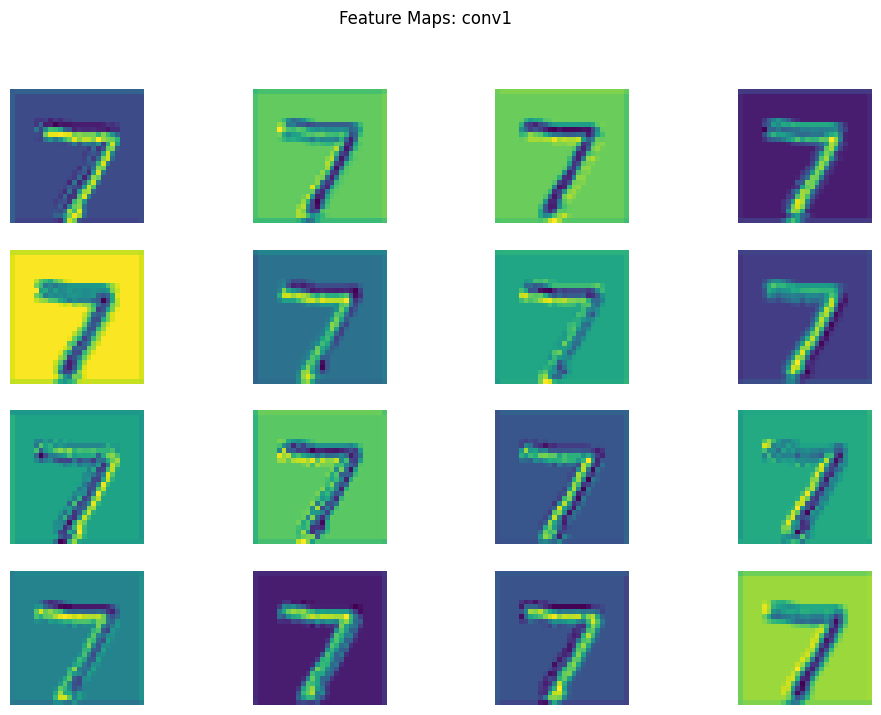

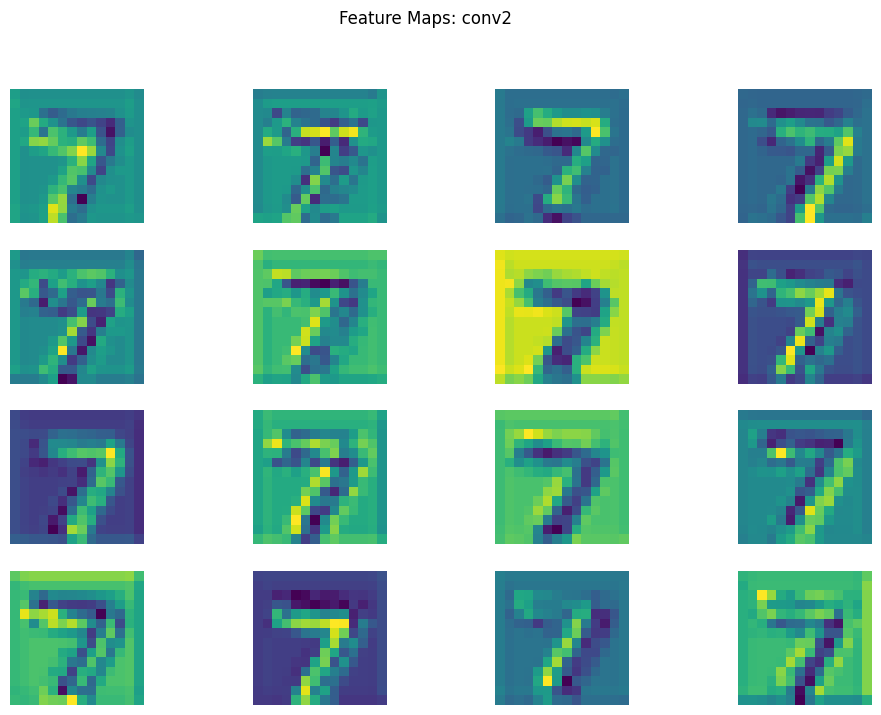

In [ ]:


visualize_feature_maps(shallowCNN, test_loader, device, 'conv1')
visualize_feature_maps(shallowCNN, test_loader, device, 'conv2')

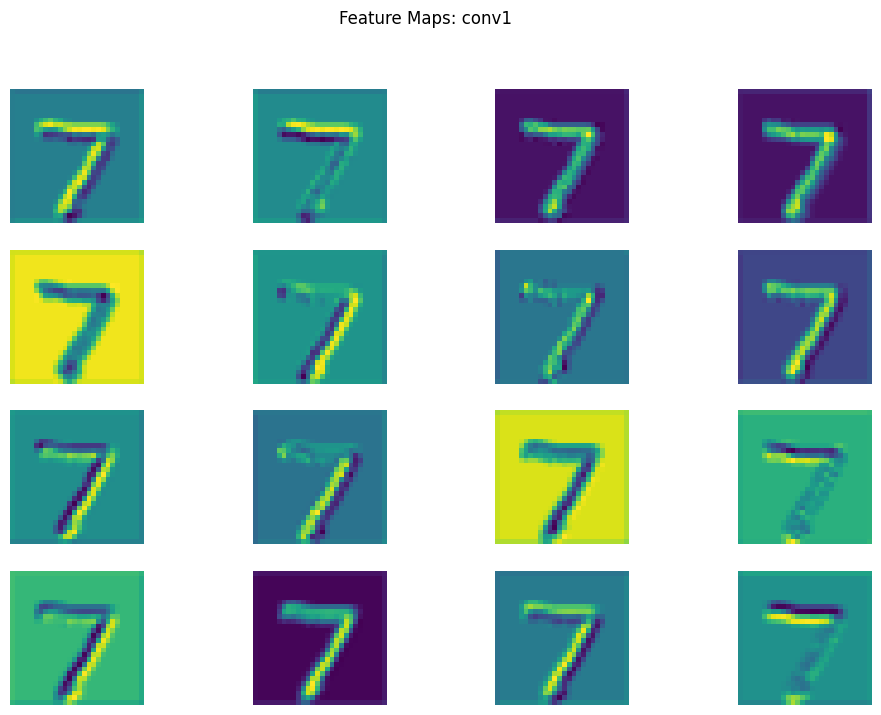

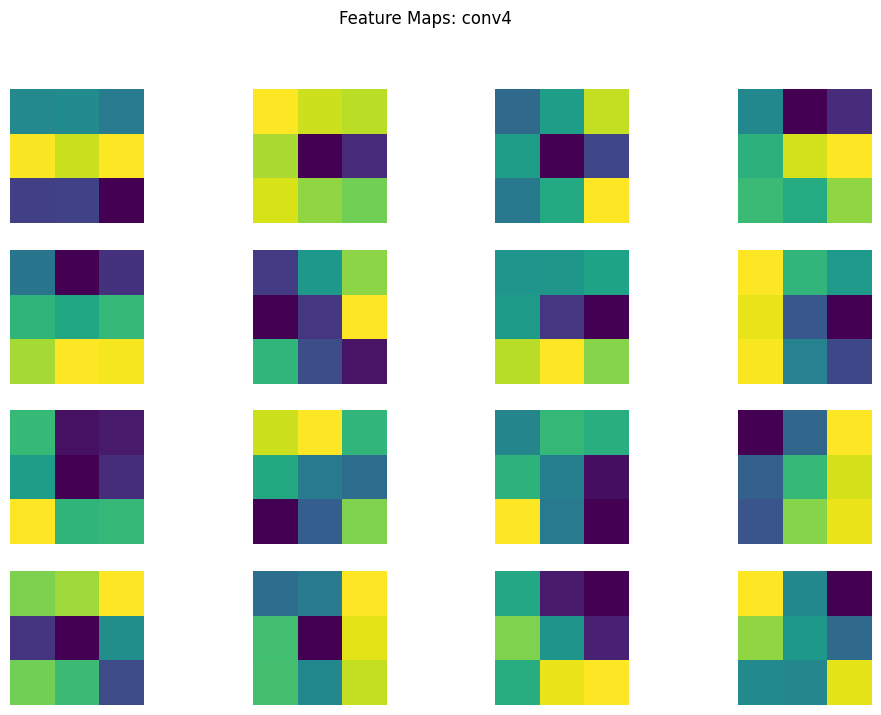

In [59]:
visualize_feature_maps(mediumCNN, test_loader, device, layer_name='conv1')
visualize_feature_maps(mediumCNN, test_loader, device, layer_name='conv4')

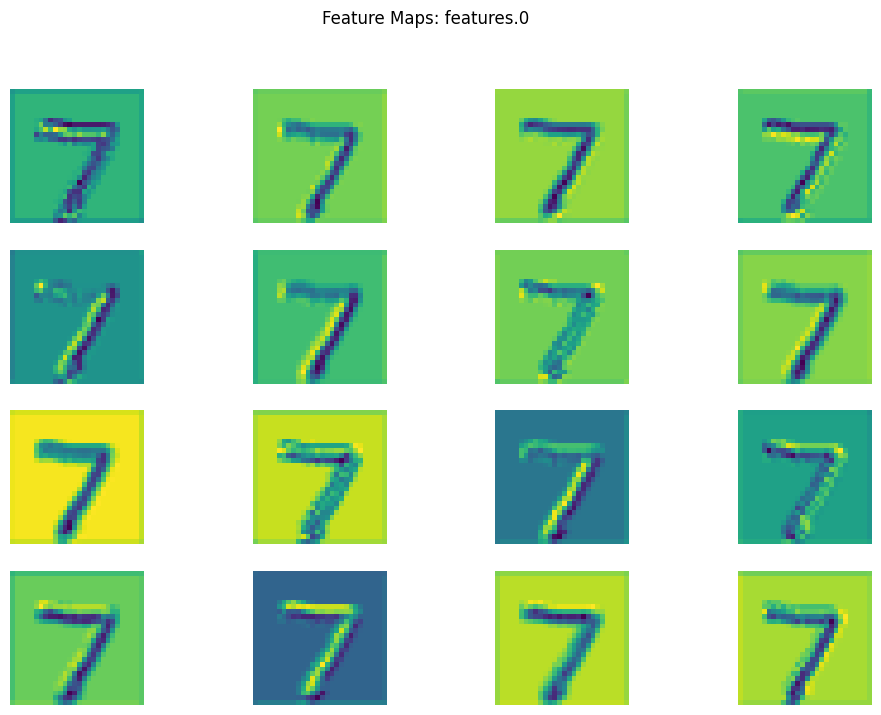

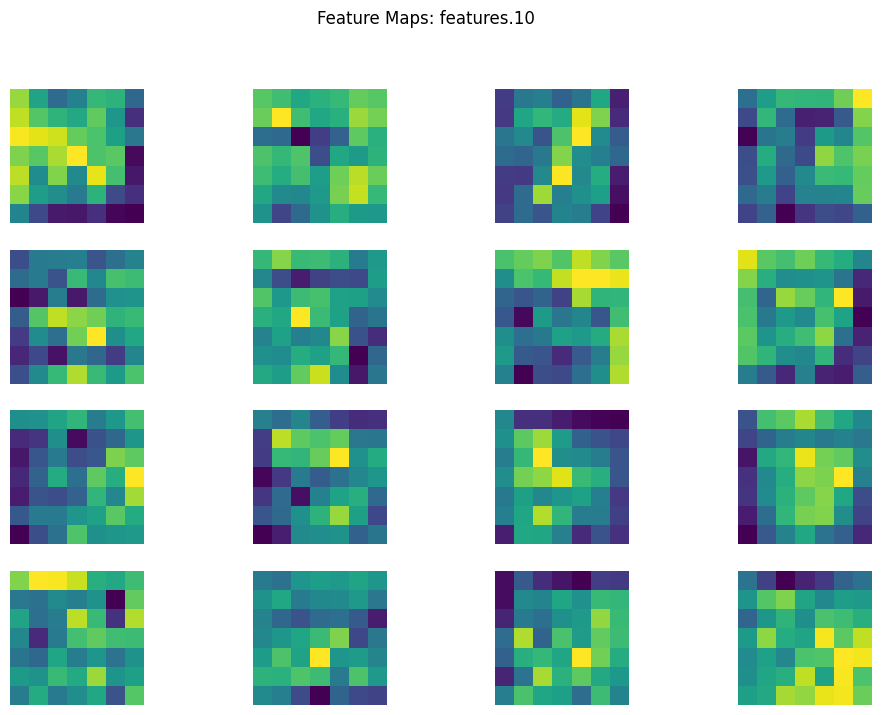

In [60]:
visualize_feature_maps(deepCNN, test_loader, device, layer_name='features.0')  # Первый слой
visualize_feature_maps(deepCNN, test_loader, device, layer_name='features.10')

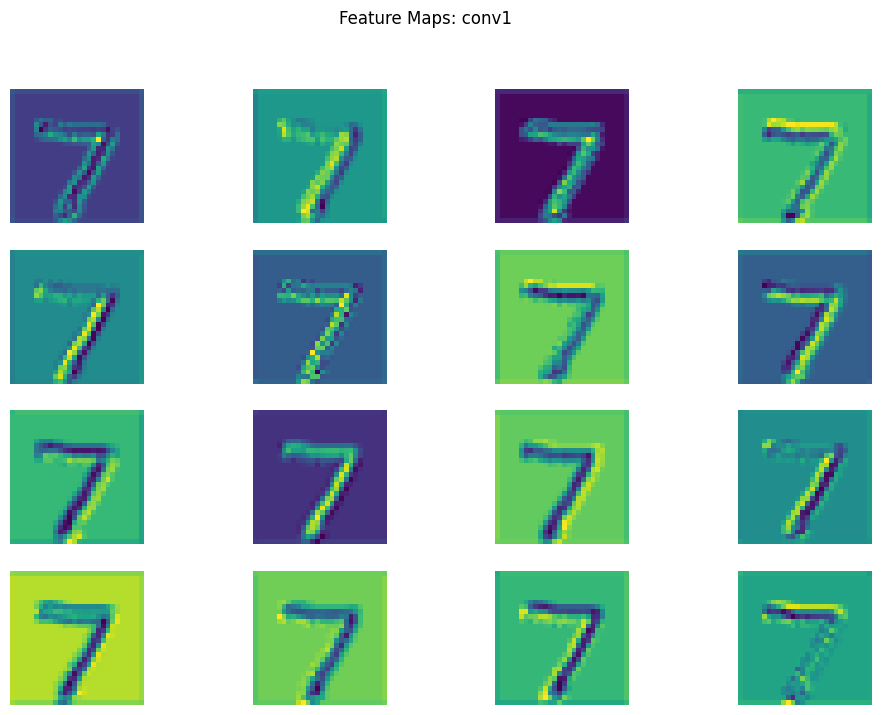

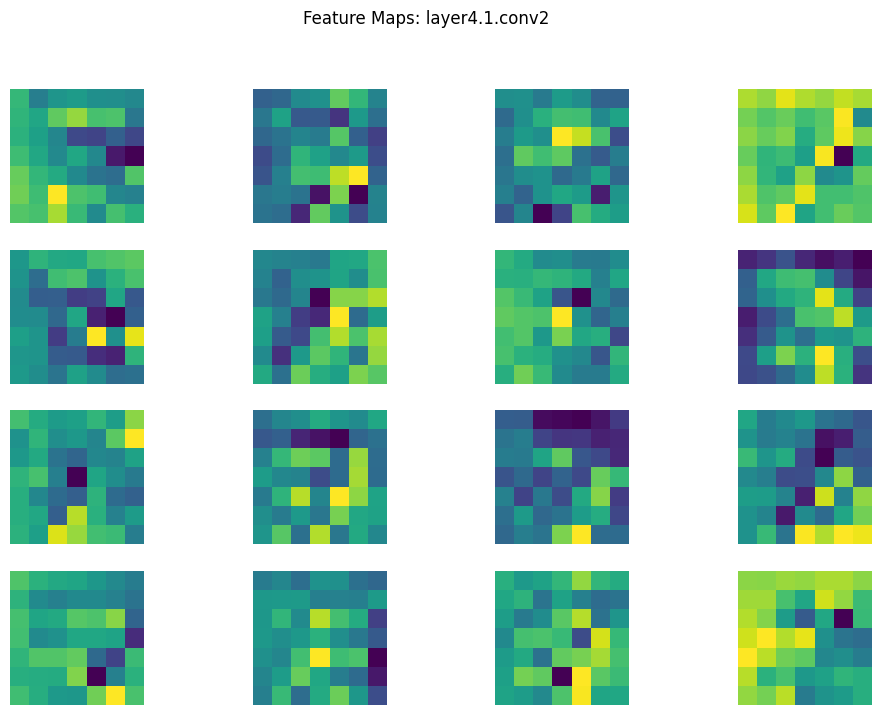

In [61]:
visualize_feature_maps(restNetNmist, test_loader, device, layer_name='conv1')
visualize_feature_maps(restNetNmist, test_loader, device, layer_name='layer4.1.conv2')  # 

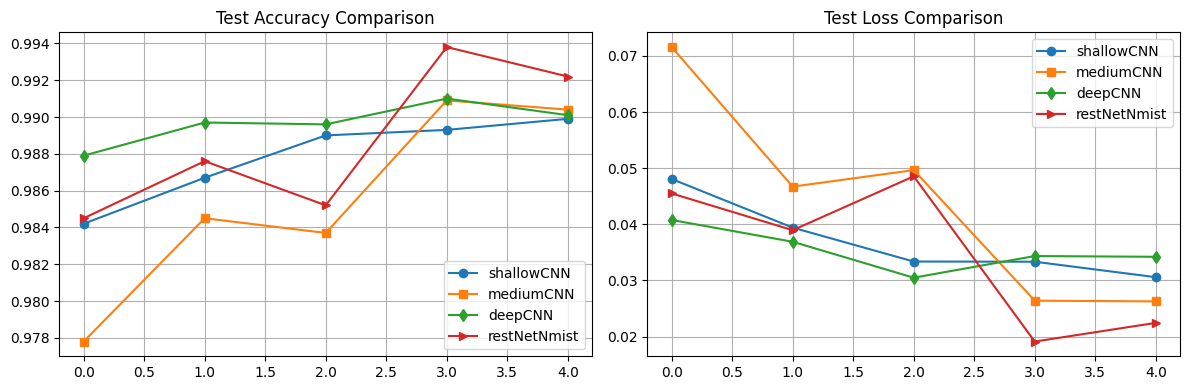

In [62]:
def compare_models(shallowCNN, mediumCNN, deepCNN, restNetNmist):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    ax1.plot(shallowCNN['test_accs'], label='shallowCNN', marker='o')
    ax1.plot(mediumCNN['test_accs'], label='mediumCNN', marker='s')
    ax1.plot(deepCNN['test_accs'], label='deepCNN', marker='d')
    ax1.plot(restNetNmist['test_accs'], label='restNetNmist', marker='>')
    ax1.set_title('Test Accuracy Comparison')
    ax1.legend()
    ax1.grid(True)
    
    ax2.plot(shallowCNN['test_losses'], label='shallowCNN', marker='o')
    ax2.plot(mediumCNN['test_losses'], label='mediumCNN', marker='s')
    ax2.plot(deepCNN['test_losses'], label='deepCNN', marker='d')
    ax2.plot(restNetNmist['test_losses'], label='restNetNmist', marker='>')
    ax2.set_title('Test Loss Comparison')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show() 
    
compare_models(shallowCNN_history, mediumCNN_history, deepCNN_history, restNetNmist_history) 

Так получилось, что параметров в restNetNmist CNN модели намного больше, чем в остальных трех моделях (2.797.066 против +- 50000) в следствие чего, она обучалась намного больше, чем другие (40 минут против 3 минут). 

Все модели, кроме маленькой (2 conv слоя) после 3 эпохи начинали переобучаться. 

Самая высокая точность у restNetNmist - 0.9938

По карте признаков - по первому слою все модели выделяют примерно одинаковые признаки (паттерны), на последнем слое трудно что либо понять. 
У средней модели (модель с 4 conv слоями) явные проблемы с выделением признаков на последнем слое (изображения 3 на 3), скорей всего это из-за AdaptiveAvgPool2d.        